# Efficient Frontier

### Portfolio of two assets

### $E(R_P)=\omega_1E(R_1) + \omega_2E(R_2),$

where $E(R_P)$ is the expected return of the portfolio,

$\omega_i$ is the weight of asset $i$,

$E(R_i)$ is the expected return of asset $i$.

#### Portfolio variance
$\sigma_P^2 = \omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + 2\omega_1\omega_2\sigma_{1,2}$,

$\sigma^2_P$ is the portfolio variance

$\sigma_{i}^2$ is the variance of assets i

$\sigma_{1,2}$ is the covariance between asset 1 and 2

$\omega_1+\omega_2=1$

Portfolio Volatility or standard deviation is
$\sigma_P = (\omega_1^2\sigma_1^2 + \omega_2^2\sigma_2^2 + 2\omega_1\omega_2\sigma_{1,2})^\frac{1}{2}$.

### Example

Two securities, say X and Y

$E(R_X)=5\%$ and $E(R_Y)=4\%$,

$\sigma_x^2=9\%, \sigma_Y^2=6\%$

$\sigma_{XY}=3\%.$

The following table presents the portfolio return and volatility for five different portfolio combinations

<img src="../Images/efficient_example.jpg">

In [12]:
library(tseries)
options(repr.plot.width=6, repr.plot.height=4)

In [2]:
Index_Value<-as.matrix(EuStockMarkets)
r<-diff(log(Index_Value))*100
no.of.portf<-10000

In [3]:
set.seed(1)

In [5]:
sigma<-mu<-rep(NA,no.of.portf)
for(i in 1:no.of.portf){
  w <- sample(1:1000,4,replace=T)
  w <- w/sum(w) ## weight for i-th portfolio
  rp <- r%*%w   ## returns of i-th portfolio
  mu[i] <- mean(rp)  ## mean return of i-th portfolio
  sigma[i] <- sd(rp) ## volatility of i-th portfolio
}

In [7]:
head(mu)

[1] 0.06226179 0.05492011 0.05219415 0.05303409 0.07132122 0.06131742

In [8]:
head(sigma)

[1] 0.8460349 0.8241745 0.8377033 0.8325218 0.8698285 0.8224210

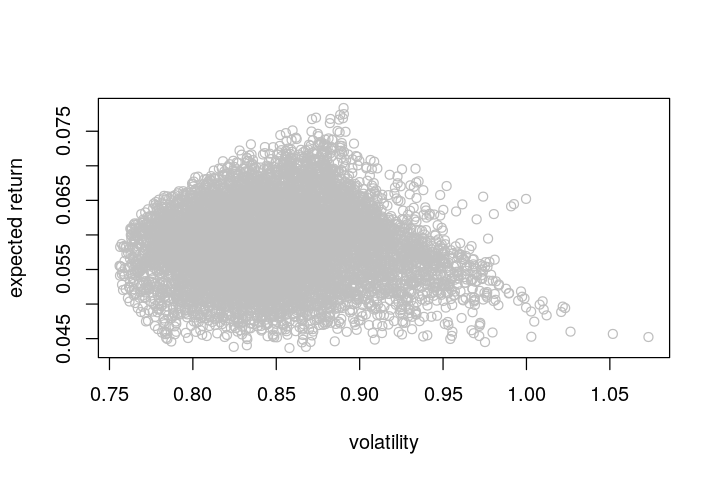

In [13]:
plot(sigma,mu,xlab = "volatility"
     ,ylab="expected return",col="grey")

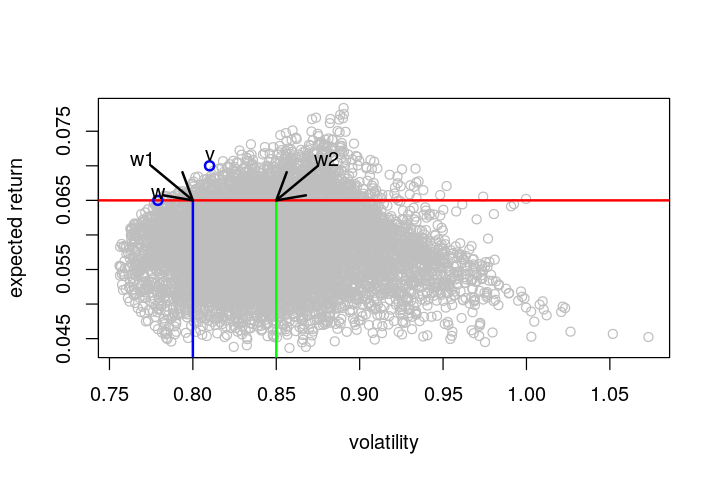

In [14]:
plot(sigma,mu,xlab = "volatility"
     ,ylab="expected return",col="grey")
abline(h=0.065,col="red",lwd=2)
segments(0.8,0.04,0.8,0.065,col="blue",lwd=2)
segments(0.85,0.04,0.85,0.065,col="green",lwd=2)
arrows(0.775,0.07,0.8,0.065,col="black",lwd=2)
arrows(0.875,0.07,0.85,0.065,col="black",lwd=2)
text(0.77,0.071,"w1")
text(0.88,0.071,"w2")
points(0.779,0.065,col="blue",lwd=2)
text(0.779,0.066,"w")
points(0.81,0.07,col="blue",lwd=2)
text(0.81,0.0715,"v")

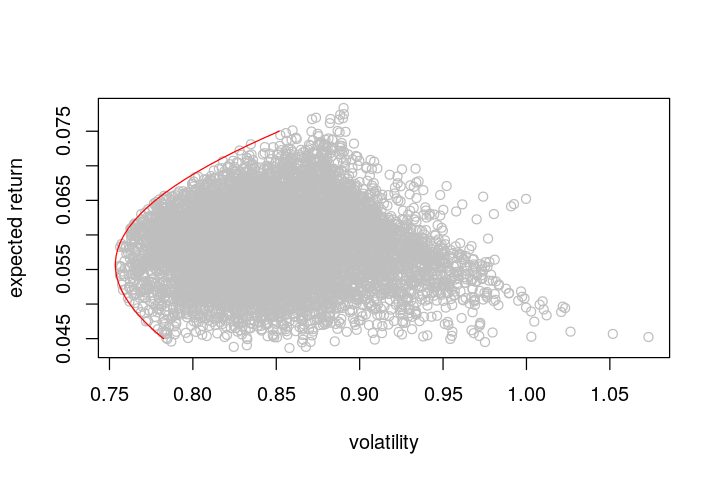

In [16]:
plot(sigma,mu,xlab = "volatility"
     ,ylab="expected return",col="grey")
Sigma<-cov(r)
er<-seq(0.045,0.075,0.001)
frontier<-matrix(NA,nrow=length(er),ncol=2)
for(i in 1:length(er)){
  port_optim<-portfolio.optim(r
                ,pm=er[i]
                ,covmat=Sigma)
  frontier[i,]<-c(port_optim$ps,port_optim$pm)
}
lines(frontier,col="red")

# Portfolio Optimization

Markowitz’s Portfolio Optimization (1952) minimizes the portfolio variance for a given level of expected return,

 - Suppose you are considering the global portfolio with passive investment strategy, where you want to invest in the ETF of FTSE, DAX, SMI and CAC.

 - Your annualized expected return is 12.5%.

 - Consider annualized risk-free rate of return as 3%.

In [17]:
Index_Value<-as.matrix(EuStockMarkets)

## log-return in percentage terms
r<-diff(log(Index_Value))*100

## expected return
expected_return <- 12.5/252

## portfolio covariance
Sigma<-cov(r)

In [18]:
port_optim<-portfolio.optim(r
                ,pm=expected_return
                ,covmat=Sigma
                ,rf=3/252)

In [19]:
weight<-port_optim$pw*100
names(weight)<-colnames(EuStockMarkets)
weight

DAX       SMI       CAC      FTSE 
 0.000000 16.560381  2.717417 80.722202

#### expected return

In [20]:
port_optim$pm

[1] 0.04960317

#### volatility at optimized weights

In [21]:
port_optim$ps

[1] 0.7633583

### Plot the efficient frontier

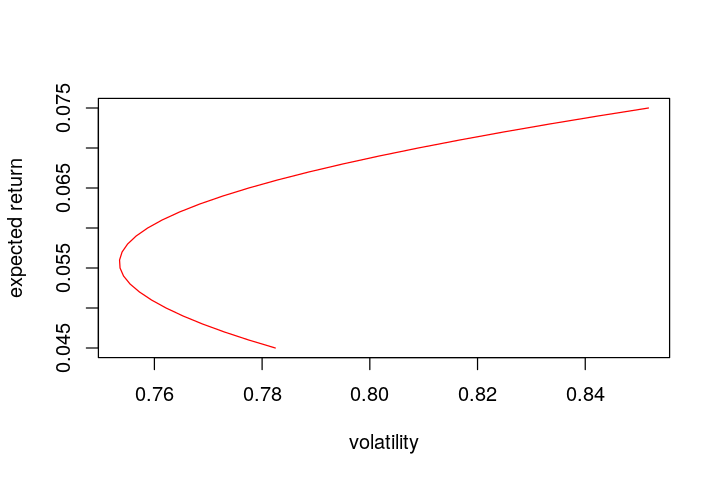

In [22]:
er<-seq(0.045,0.075,0.001)
frontier<-matrix(NA,nrow=length(er),ncol=2)
for(i in 1:length(er)){
  port_optim<-portfolio.optim(r
                ,pm=er[i]
                ,covmat=Sigma
                ,rf=3/252)
  frontier[i,]<-c(port_optim$ps,port_optim$pm)
}
plot(frontier,col="red",type = "l"
     ,xlab="volatility"
     ,ylab = "expected return")